# NLP - lesson1 - homework1- 代码复现

已知语法，用代码实现语句构建

In [39]:
two_num = ''' num num
num => '0|1|2|3|4 '
'''

In [8]:
import random

In [9]:
def two_num ():
    return num()+num()
def num():
    return random.choice( '0|1|2|3|4 '.split('|'))

def numbers():
    if random.random() < 0.5:        
        return  num()
    else:    
        return  numbers()+num()


In [10]:
for i in range(50):
    print(numbers())

0
4 
23
0
3
1
3
4 
4 
4 
04 304 
1
00
2
133
4 0
014 
334 32
2
0
22
4 3
4 
2
3
24 12121
4 
24 14 
34 1
323
04 11
20
0
0
4 
4 0
2
0
3
114 4 4 
4 4 04 02
12
21
4 
3
3
0
2
024 
3


语法可以用代码实现；可以用递归创建无限长代码

“*” 代表0个或多个

In [11]:
simple_grammar = """
sentence => noun_phrase verb_phrase    句子 = 名词短语 + 动词短语
noun_phrase => Article Adj* noun       名词短语 = 冠词 + 形容词* + 名词     
Adj* => null | Adj Adj*                形容词*  = 没有 | 形容词 + 形容词*
verb_phrase => verb noun_phrase        动词短语 = 动词 + 名词短语
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [1]:
import random

In [2]:
def adj():  
    return random.choice('蓝色的 | 好看的 | 小小的'.split('|')).split()[0]
def adj_star():
    return random.choice([lambda : '', lambda : adj() + adj_star()])()

In [3]:
def sentence():
    return noun_phrase() + verb_phrase()
def noun_phrase():
    return Article() + adj() + noun()
def Article():
    return random.choice('一个 | 这个'.split('|'))
def noun():
    return random.choice('女人 |  篮球 | 桌子 | 小猫'.split('|'))
def verb_phrase():
    return verb() + noun_phrase() 
def verb():
    return random.choice('看着 | 坐在 | 听着 | 看见'.split('|'))
  

In [4]:
for i in range(10):
    print(sentence())

一个 小小的 小猫 听着 一个 好看的 小猫
 这个好看的 小猫 看见一个 好看的 桌子 
一个 好看的  篮球  听着  这个好看的 小猫
一个 小小的 桌子  听着 一个 小小的女人 
 这个好看的女人 看着  这个小小的 小猫
一个 蓝色的  篮球  看见一个 小小的  篮球 
 这个好看的女人 看着  这个蓝色的女人 
一个 蓝色的女人  听着 一个 好看的 小猫
 这个好看的 小猫 看见一个 好看的 桌子 
 这个蓝色的  篮球  坐在 一个 蓝色的  篮球 


But the question is ? 如果我们更换了语法，会发现所有写过的程序，都要重新写。:(




思路： data drive 数据变化，程序不变 ； 先思考数据结构，再思考如何构建程序；

重点： 如何写好“规则引擎”！！！

1. 创建字典
2. 将语法中的变量作为 字典中的 key
3. 语法结构中，不是变量 ； 直接输出

In [5]:
two_num_add = '''
two => num op num | num op num
op => + | - | * | /
num => 1|2|3|4
'''

In [6]:
def generate_grammar(grammar_str: str ,target,split='=>' ):
    grammar ={}
    
    for line in grammar_str.split('\n'):
        if not line: continue
        
        expression, formula = line.split(split)
        
        formulas = formula.split('|')
        
        formulas = [f.split() for f in formulas]
        
        grammar[expression.strip()] = formulas
        
        print(expression,':' ,formulas)
    return grammar

choice_a_expr = random.choice

def generate_by_grammar(grammar:dict,target:str):
    if target not in grammar: return target    
    expr = choice_a_expr(grammar[target])
    
    return ' '.join( generate_by_grammar(grammar,t) for t in expr)

def generate_by_str(grammar_str,split,target):
    grammar = generate_grammar(grammar_str , target , split)
    return generate_by_grammar(grammar,target)






In [7]:
generate_by_str(two_num_add,split ='=>' , target ='two')

two  : [['num', 'op', 'num'], ['num', 'op', 'num']]
op  : [['+'], ['-'], ['*'], ['/']]
num  : [['1'], ['2'], ['3'], ['4']]


'1 / 3'

In [8]:
generated_grammar = generate_grammar(two_num_add,target = 'two')

two  : [['num', 'op', 'num'], ['num', 'op', 'num']]
op  : [['+'], ['-'], ['*'], ['/']]
num  : [['1'], ['2'], ['3'], ['4']]


In [9]:
generated_grammar

{'two': [['num', 'op', 'num'], ['num', 'op', 'num']],
 'op': [['+'], ['-'], ['*'], ['/']],
 'num': [['1'], ['2'], ['3'], ['4']]}

In [49]:
test = 'ab,cd,ef' 

#a = test.split(',')
a = test.split(',')
b,c,d = test.split(',')
print(b,c,d)


ab cd ef


In [50]:
#在西部世界里，一个”人类“的语言可以定义为：

human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
"""


#一个“接待员”的语言可以定义为

host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [51]:
generate_by_str(host,split ="=" , target ='host')

host  : [['寒暄', '报数', '询问', '业务相关', '结尾']]
报数  : [['我是', '数字', '号', ',']]
数字  : [['单个数字'], ['数字', '单个数字']]
单个数字  : [['1'], ['2'], ['3'], ['4'], ['5'], ['6'], ['7'], ['8'], ['9']]
寒暄  : [['称谓', '打招呼'], ['打招呼']]
称谓  : [['人称', ',']]
人称  : [['先生'], ['女士'], ['小朋友']]
打招呼  : [['你好'], ['您好']]
询问  : [['请问你要'], ['您需要']]
业务相关  : [['玩玩', '具体业务']]
玩玩  : [['null']]
具体业务  : [['喝酒'], ['打牌'], ['打猎'], ['赌博']]
结尾  : [['吗？']]


'女士 , 你好 我是 5 号 , 请问你要 null 赌博 吗？'

# Language Model
𝑙𝑎𝑛𝑔𝑢𝑎𝑔𝑒_𝑚𝑜𝑑𝑒𝑙(𝑆𝑡𝑟𝑖𝑛𝑔)=𝑃𝑟𝑜𝑏𝑎𝑏𝑖𝑙𝑖𝑡𝑦(𝑆𝑡𝑟𝑖𝑛𝑔)∈(0,1)
language_model(String)=Probability(String)∈(0,1)


In [2]:
import random


In [3]:
random.choice(range(100))

45

In [4]:
filename = 'C:\\Users\\wnapple\\Desktop\\dataset\\sqlResult_1558435.csv'

In [5]:
import pandas as pd

In [6]:
content = pd.read_csv(filename, encoding='gb18030')

In [7]:
content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [8]:
articles = content['content'].tolist()   #tolist（） 将数组或句子转化成列表

In [9]:
len(articles)

89611

In [34]:
articles[1]

'骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考虑性能而去屏蔽掉小核心。相反，他们正联手微软，找到一种适合桌面平台的、兼顾性能和功耗的完美方案。\r\n报道称，微软已经拿到了一些新的源码，以便Windows 10更好地理解big.little架构。\r\n资料显示，骁龙835作为一款集成了CPU、GPU、基带、蓝牙/Wi-Fi的SoC，比传统的Wintel方案可以节省至少30%的PCB空间。\r\n按计划，今年Q4，华硕、惠普、联想将首发骁龙835 Win10电脑，预计均是二合一形态的产品。\r\n当然，高通骁龙只是个开始，未来也许还能见到三星Exynos、联发科、华为麒麟、小米澎湃等进入Windows 10桌面平台。\r\n'

In [35]:
import re  #用正则去掉段落中的特殊符号

In [36]:
def token(string):

    return re.findall('\w+', string)    # \w 代表找所有的words ；复习 re.findall（）

In [33]:
token(articles[5])

['受到A股被纳入MSCI指数的利好消息刺激',
 'A股市场从周三开始再度上演龙马行情',
 '周四上午金融股和白马股表现喜人',
 '但是尾盘跳水之后',
 '仅金融板块仍维系红盘状态',
 '分析人士认为',
 '金融股受益于MSCI纳入A股和低估值而重获资金青睐',
 '但是存量资金博弈格局下',
 '风格交替的震荡格局料延续',
 '流动性改善',
 '经济悲观预期修正等有助于支撑板块继而大盘指数逐步向好',
 '一九',
 '再现',
 '周四',
 'A股市场未能延续周三的上行态势',
 '两市成交小幅放量',
 '29个中信一级行业中',
 '收盘仅银行和非银行金融两个行业指数收红',
 '分别上涨1',
 '80',
 '和0',
 '20',
 '从二级行业来看',
 '股份制与城商行的涨幅最高',
 '达到2',
 '22',
 '国有银行上涨0',
 '82',
 '信托及其他上涨0',
 '64',
 '保险板块上涨0',
 '34',
 '证券板块上涨0',
 '06',
 '银行板块25只成分股中',
 '共有21只收红',
 '其中',
 '招商银行涨幅最大',
 '上涨6',
 '66',
 '贵阳银行上涨3',
 '65',
 '上海银行',
 '华夏银行',
 '浦发银行和兴业银行的涨幅均超过1',
 '50',
 '非银行金融板块44只成分股中',
 '共17只个股上涨',
 '其中',
 '安信信托',
 '中国太保涨幅居前两名',
 '分别上涨4',
 '57',
 '和3',
 '04',
 '西水股份',
 '华安证券',
 '中国人寿和新华保险的涨幅也均超过2',
 '相对而言',
 '券商股多小幅下跌',
 '近期',
 '对A股市场消息面影响最大的就是MSCI宣布从2018年6月开始将A股纳入MSCI新兴市场指数',
 '而其中',
 '金融股是占比最大的一个群体',
 '国金证券李立峰团队指出',
 '最新方案中包含的222只成分股中',
 '剔除了中等市值',
 '非互联互通可交易的股票以及有停牌限制的标的',
 '由于纳入了很多大市值AH股',
 'A股在MSCI',
 'EM中的权重由0',
 '5',
 '上升到了0',
 '73',
 '其中',
 '金融板块占比最高',
 '达到40',
 '11'

In [38]:
from collections import Counter    #用于统计每个元素出现的次数

In [39]:
import jieba

In [45]:
with_jieba_cut = Counter(jieba.cut(articles[1]))
print(with_jieba_cuth_jieba_cut)

Counter({'，': 13, '、': 9, '的': 8, '。': 6, '\r\n': 5, '骁龙': 4, ' ': 4, '835': 3, 'Windows': 3, '10': 3, '桌面': 3, '平台': 3, '作为': 2, '高通': 2, '性能': 2, '微软': 2, '方案': 2, '了': 2, '唯一': 1, '通过': 1, '认证': 1, 'ARM': 1, '处理器': 1, '强调': 1, '不会': 1, '因为': 1, '只': 1, '考虑': 1, '而': 1, '去': 1, '屏蔽掉': 1, '小': 1, '核心': 1, '相反': 1, '他们': 1, '正': 1, '联手': 1, '找到': 1, '一种': 1, '适合': 1, '兼顾': 1, '和': 1, '功耗': 1, '完美': 1, '报道': 1, '称': 1, '已经': 1, '拿到': 1, '一些': 1, '新': 1, '源码': 1, '以便': 1, '更好': 1, '地': 1, '理解': 1, 'big': 1, '.': 1, 'little': 1, '架构': 1, '资料': 1, '显示': 1, '一款': 1, '集成': 1, 'CPU': 1, 'GPU': 1, '基带': 1, '蓝牙': 1, '/': 1, 'Wi': 1, '-': 1, 'Fi': 1, 'SoC': 1, '比': 1, '传统': 1, 'Wintel': 1, '可以': 1, '节省': 1, '至少': 1, '30%': 1, 'PCB': 1, '空间': 1, '按计划': 1, '今年': 1, 'Q4': 1, '华硕': 1, '惠普': 1, '联想': 1, '将': 1, '首发': 1, 'Win10': 1, '电脑': 1, '预计': 1, '均': 1, '是': 1, '二合一': 1, '形态': 1, '产品': 1, '当然': 1, '只是': 1, '个': 1, '开始': 1, '未来': 1, '也许': 1, '还': 1, '能': 1, '见到': 1, '三星': 1, 'Exynos': 1, '联发科': 1,

In [43]:
list(jieba.cut('尝试一下用jieba'))

['尝试', '一下', '用', 'jieba']

In [44]:
with_jieba_cut.most_common()[:10]   #输出前十个频次最高的

[('，', 13),
 ('、', 9),
 ('的', 8),
 ('。', 6),
 ('\r\n', 5),
 ('骁龙', 4),
 (' ', 4),
 ('835', 3),
 ('Windows', 3),
 ('10', 3)]

In [46]:
''.join(token(articles[1]))     #对字符串进行拼接 join（）

'骁龙835作为唯一通过Windows10桌面平台认证的ARM处理器高通强调不会因为只考虑性能而去屏蔽掉小核心相反他们正联手微软找到一种适合桌面平台的兼顾性能和功耗的完美方案报道称微软已经拿到了一些新的源码以便Windows10更好地理解biglittle架构资料显示骁龙835作为一款集成了CPUGPU基带蓝牙WiFi的SoC比传统的Wintel方案可以节省至少30的PCB空间按计划今年Q4华硕惠普联想将首发骁龙835Win10电脑预计均是二合一形态的产品当然高通骁龙只是个开始未来也许还能见到三星Exynos联发科华为麒麟小米澎湃等进入Windows10桌面平台'

In [50]:
articles_clean = [''.join(token(str(a))) for a in articles]

In [51]:
len(articles_clean)

89611

In [58]:
articles_clean[89610]

'新华社德国杜塞尔多夫６月６日电题乒乓女球迷n新华社记者王子江张寒n熊老师离开上海前特意花一千多元买了一只张继科代言的球拍准备在世界锦标赛期间他赢了比赛后能在球拍上签个名但没想到张继科在３２强赛中输给了韩国的李尚洙n拍子算是白拿过来了熊老师摇头就算是信仰充值了n信仰充值是乒乓球粉丝圈非常流行的词汇简单来说就是为自己喜欢的明星或球队花钱n熊老师是这位２２岁的成都姑娘的艺名艺名这一称呼也是她们自己形容的熊老师的真实身份是上海一所名牌大学会计专业的大四学生其他同学正在抓紧毕业找工作她一个人溜到德国观看世乒赛尽管带着张继科的球拍但熊老师并不是张的铁粉她并不喜欢张继科输了比赛之后一堆科迷在赛场外抱头痛哭的场景而显得比较理智但是因为科迷数量众多让她这种散户也有些说不出的羡慕n他们竟然连续两天买断了一面看台上所有的门票为的是挂起带有张继科名字的旗子两天就要花４５万人民币熊老师直喊过分n熊老师与其他１０名中国队女球迷挤在一套三居室里厨房的柜子里塞了很多方便面至少三个人挤在一个房间里条件的确差了点但住宿费平摊下来每天只有大约２００元人民币这样让大家心里平衡了很多n房间里的所有人都是在网上认识的大家也并不全知道对方真实的姓名和身份我们都用艺名来自广州的茶茶说茶茶已经工作了几年这次也是利用假期出来的n所有人都是提前大约半年从国际乒联的官网上买了比赛的通票可以观看全程所有的比赛票价大约两千块人民币５月底６月初并不是旅游旺季机票也不是太贵这让她们都很庆幸n里面最幸运的应该是井井她这次来的身份是一家时尚媒体的记者她申请到了记者证每天背着一个大相机在场地里边拍照边看球她提前大约一个星期就来到了德国比赛开始前她去附近几个城市玩了玩这一趟世乒赛之旅非常充实n十几个人中最不像球迷的是一位来自香港的女大学生看上去文静内向其他人都叫她香港妹香港妹与熊老师一样都是学的会计专业她告诉父母这次出来是到德国看朋友住宿和球票的花费都是平时做家教挣的父母支援了机票钱从香港到杜塞尔多夫往返只有三千多元人民币让其他内地球迷非常羡慕n香港妹以前并不懂乒乓球去年里约奥运会时一家人边吃饭边看电视正好电视直播乒乓球比赛从此她就成了中国队的球迷n香港妹更让人羡慕的还是来德国不用签证不过熊老师也欣慰地说这次有了德国的签证以后去日本看比赛签证就容易多了n这些女孩子大部分都是第一次出国以前都是在国内看比赛熊老师自称这几年甚至到过一些非常

经验：数据预处理（重要信息要实时保存）
数据要存到硬盘里
如何做？　方法：生成一个新文件，存到里面


In [54]:
with open('article_9k.txt', 'w') as f:                         
    for a in articles_clean:
        f.write(a + '\n')

In [29]:
import jieba

In [30]:
def cut(string): return  list(jieba.cut(string))

In [31]:
TOKEN = []

In [32]:
TOKEN = cut (open('article_9k.txt').read())       #读取txt中的内容，并完成切词，存在TOKEN中

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\wnapple\AppData\Local\Temp\jieba.cache
Loading model cost 1.282 seconds.
Prefix dict has been built successfully.


In [33]:
len(TOKEN)  # 1.7kw个单词

17618254

In [34]:
from functools import reduce           #计算阶乘用的工具包   
from operator import add,mul

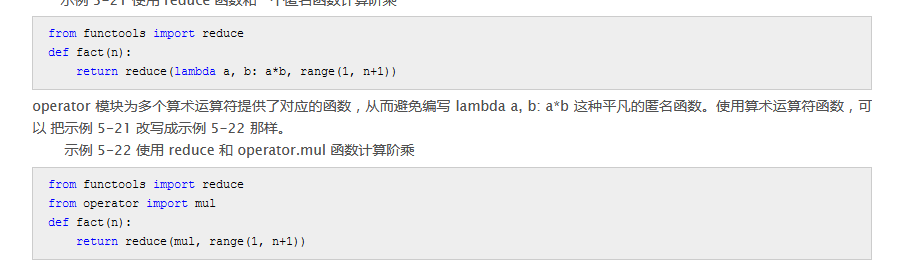

In [35]:
reduce(add,[1,2,3,4,5]) 

15

## nlp比较重要的规律: 出现频率第二多的单词是第一多的1/2 ； 第n多的单词是第1多的单词的1/N

## 1-GRam模型的原理和代码实现
## 语料库数据放大（homework）

In [36]:
from collections import Counter   

In [37]:
words_count = Counter(TOKEN)         #统计TOKEN中的单词数量

In [38]:
words_count.most_common(100)         #前100排序  

[('的', 703716),
 ('n', 382020),
 ('在', 263597),
 ('月', 189330),
 ('日', 166300),
 ('新华社', 142462),
 ('和', 134061),
 ('年', 123106),
 ('了', 121938),
 ('是', 100909),
 ('\n', 89611),
 ('１', 88187),
 ('０', 84945),
 ('外代', 83268),
 ('中', 73926),
 ('中国', 71179),
 ('２', 70521),
 ('2017', 69894),
 ('记者', 62147),
 ('二线', 61998),
 ('将', 61420),
 ('与', 58309),
 ('等', 58162),
 ('为', 57019),
 ('5', 54578),
 ('照片', 52271),
 ('4', 51626),
 ('对', 50317),
 ('上', 47452),
 ('也', 47401),
 ('有', 45767),
 ('５', 40857),
 ('说', 39017),
 ('发展', 37632),
 ('他', 37194),
 ('３', 36906),
 ('以', 36867),
 ('国际', 35842),
 ('nn', 35330),
 ('４', 34659),
 ('比赛', 32232),
 ('６', 30575),
 ('到', 30109),
 ('人', 29572),
 ('从', 29489),
 ('6', 29002),
 ('都', 28027),
 ('不', 27963),
 ('后', 27393),
 ('当日', 27186),
 ('就', 26684),
 ('并', 26568),
 ('国家', 26439),
 ('７', 26386),
 ('企业', 26147),
 ('进行', 25987),
 ('3', 25491),
 ('美国', 25485),
 ('举行', 25389),
 ('被', 25277),
 ('北京', 25245),
 ('体育', 24873),
 ('2', 24376),
 ('1', 24182),
 ('这', 

In [39]:
frequiences = [f for w, f in words_count.most_common(100)]   

In [40]:
x = [i for i in range(100)]

In [41]:
import matplotlib.pyplot as plt

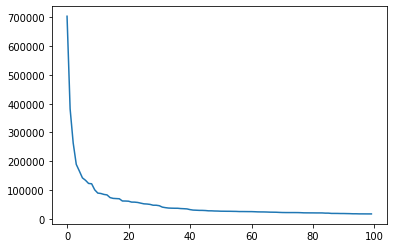

In [42]:
plt.plot(x, frequiences)

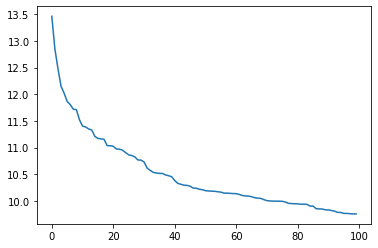

In [43]:
import numpy as np                     #对数变换
plt.plot(x, np.log(frequiences))

In [44]:
def prob_1(word):                                 #公式：prob_1(某词)= 某个词的出现的次数/预料库总词数
    return words_count[word] / len(TOKEN)

In [45]:
prob_1('科比')

4.256948503523675e-06

In [46]:
TOKEN[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [47]:
TOKEN = [str(t) for t in TOKEN]         #将所有的词转为字符型

In [48]:
TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]       #将两个词连在一起[0,1][1,2],[2,3],[n,n+1]=> 01,12,23,34

In [49]:
TOKEN_2_GRAM[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [50]:
words_count_2 = Counter(TOKEN_2_GRAM)

In [51]:
def prob_1(word): return words_count[word] / len(TOKEN)

In [52]:
def prob_2(word1, word2):                        # 如何 两个词连一起出现在 count2里；那么输出其概率
    if word1 + word2 in words_count_2: return words_count_2[word1+word2] / len(TOKEN_2_GRAM)
    else:
        return 1 / len(TOKEN_2_GRAM)

In [58]:
def get_probablity(sentence):             #定义句子概率函数
    words = cut(sentence)                 #输入一个句子切词       
    sentence_pro = 1                      #初始句子为概率为1         
    for i, word in enumerate(words[:-1]):  
        next_ = words[i+1]               # next是words后一个相联单词           
        
        probability = prob_2(word, next_)
        
        sentence_pro *= probability
    
    return sentence_pro

In [59]:
get_probablity('科比今天访问中国')

1.3714273641474264e-20

In [1]:
for sen in [generate(gram=example_grammar, target='sentence') for i in range(10)]:
    print('sentence: {} with Prb: {}'.format(sen, get_probablity(sen)))

NameError: name 'generate' is not defined

In [2]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = get_probablity(s1), get_probablity(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

NameError: name 'get_probablity' is not defined